In [1]:
import urllib.request
import os
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
nltk.download('stopwords')

%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aamr9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('movie.csv')

In [4]:
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


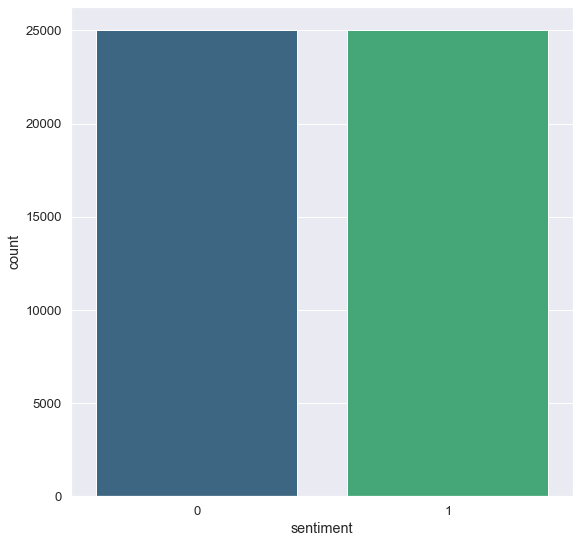

In [6]:
sns.countplot(x='sentiment', data=df, palette='viridis')

In [7]:
tokenizer=RegexpTokenizer(r'\w+')
en_stopwords=set(stopwords.words('english'))
ps=PorterStemmer()
def getStemmedReview(review):
    review=review.lower()
    review=review.replace("<br /><br />"," ")

    
    tokens=tokenizer.tokenize(review)
    new_tokens=[token for token in tokens if token not in  en_stopwords]
    stemmed_tokens=[ps.stem(token) for token in new_tokens]
    clean_review=' '.join(stemmed_tokens)
    return clean_review

In [ ]:
df['review'].apply(getStemmedReview)
X_train = df.loc[:35000, 'review'].values
y_train = df.loc[:35000, 'sentiment'].values
X_test = df.loc[35000:, 'review'].values
y_test = df.loc[35000:, 'sentiment'].values

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, decode_error='ignore')
vectorizer.fit(X_train)
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
print(' training data is:'+str(model.score(X_train,y_train)))
print(' testing data is:'+str(model.score(X_test,y_test)))

 training data is:0.935973257906917
 testing data is:0.8976666666666666


In [21]:
from sklearn.externals import joblib
joblib.dump(en_stopwords,'stopwords.pkl') 
joblib.dump(model,'model.pkl')
joblib.dump(vectorizer,'vectorizer.pkl')

C:\Users\aamr9\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['vectorizer.pkl']

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-10-6b5c839ee387>, line 1)